In [10]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# describe the model
def deriv(y, t, N, delta, beta, theta, d, k): 
    S, E, I, R, D = y
    if t<100:
        P = 1 - (I/N)**(1/20)                   
        dSdt = -P * beta * S * I / N            
        dEdt = P * beta * S * I / N - delta * E 
        dIdt = delta * E - k * I                
        dRdt = (1 - d) * k * I
        dDdt = I * d * k
    elif 100<=t<180:
        P = 1 - (I/N)**(1/10)
        dSdt = -P * beta * 0.5 * S * I / N
        dEdt = P * beta * 0.5 * S * I / N - delta * E
        dIdt = delta * E - k * I
        dRdt = (1 - d) * k * I
        dDdt = I * d * k
    elif 180<=t<250:
        P = 1 - (I/N)**(1/10)
        dSdt = -P * beta * S * I / N + theta * R
        dEdt = P * beta * S * I / N - delta * E
        dIdt = delta * E - k * I
        dRdt = (1 - d) * k * I - theta * R
        dDdt = I * d * k
    elif 250<=t<360:
        P = 1 - (I/N)**(1/10)
        dSdt = -P * beta * S * I / N + theta * R
        dEdt = P * beta * S * I / N - delta * E
        dIdt = delta * E - k * I
        dRdt = (1 - d) * k * I - theta * R
        dDdt = I * d * k
    else:
        P = 1 - (I/N)**(1/20)
        dSdt = -P * beta * S * I / N - 10000
        dEdt = P * beta * S * I / N - delta * E
        dIdt = delta * E - k * I
        dRdt = (1 - d) * k * I + 10000
        dDdt = I * d * k
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [11]:
#We chose to split the model into different periods. t<100 is first period of the pandemic (March, April, May), 100<t<180 is summer,
#180<t<250 is fall and 250<t<360 is winter. P symbolize policychanges, here we have assumed that they are directly correlated to the number of infectious.



<ipython-input-10-2e27fd166acd>:38: RuntimeWarning: invalid value encountered in double_scalars
  P = 1 - (I/N)**(1/20)


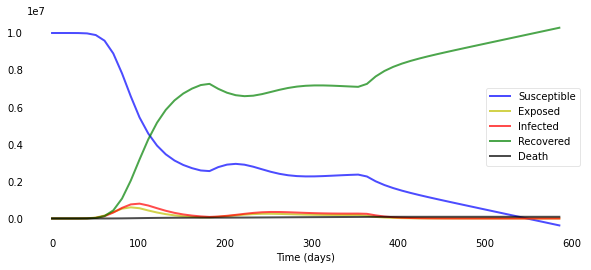

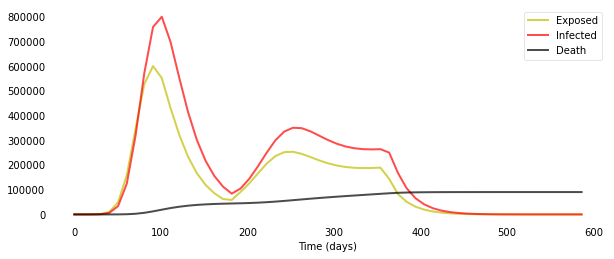

In [12]:
# describe the parameters
N = 10000000                 #population in Sweden.
delta = 1.0/5.0              #incubation time.
beta = 2                     #reproduction number           
theta = 1/180                #rate of lost immunity
d = 0.006                    #fatality risk, 0.6 % of infected on average.
k=1/7                        #infectious period
                                
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0 # initial conditions: one infected, rest susceptible

t = np.linspace(0, 1000, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, delta, beta, theta, d, k))
S, E, I, R, D = ret.T

def plotsir(t, S, E, I, R, D): 
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Death')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

def subplotsir(t, E, I, D): 
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Death')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();


plotsir(t, S, E, I, R, D)
subplotsir(t, E, I, D)